# 1. Import relevant libraries

In [352]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Load and split the dataset

In [353]:
# Load the dataset
df = pd.read_csv('data_x_y.csv')
df.head()

,Z,A,E,Theta,omega,cross_section,E_omega,cos_Theta,E_ela,E_inela
0,2,4,0.15,60.0,0.020,6600.0,0.01950,0.5,0.011088,0.324102
1,2,4,0.15,60.0,0.025,8242.5,0.01875,0.5,0.011088,0.324102
2,2,4,0.15,60.0,0.030,12422.5,0.01800,0.5,0.011088,0.324102
3,2,4,0.15,60.0,0.035,12080.0,0.01725,0.5,0.011088,0.324102
4,2,4,0.15,60.0,0.040,10205.0,0.01650,0.5,0.011088,0.324102


We need to separate the features from the target variable. Then we can split the dataset into training and test sets.

In [354]:
# Build X and y datasets
X = df.drop('cross_section', axis=1)
y = df['cross_section']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10862, 9)
y shape: (10862,)


Description of the dataset

In [355]:
df.describe()

,Z,A,E,Theta,omega,cross_section,E_omega,cos_Theta,E_ela,E_inela
count,10862.000000,10862.000000,10862.000000,10862.000000,10862.000000,1.086200e+04,10862.000000,10862.000000,10862.000000,10862.000000
mean,11.625575,25.184773,2.272971,49.908801,0.672979,1.196156e+03,1.163087,0.563965,0.620456,0.875410
std,9.544165,21.314716,2.171930,40.136723,0.830657,4.305126e+03,1.683546,0.539676,0.854044,0.818923
min,2.000000,4.000000,0.120000,8.000000,0.000000,9.174250e-07,0.008067,-1.000000,0.005040,0.292589
25%,2.000000,4.000000,0.480000,18.000000,0.155000,3.828958e+00,0.137882,0.500000,0.099204,0.369501
50%,6.000000,12.000000,1.500000,37.100000,0.340750,1.455643e+02,0.326079,0.797584,0.201363,0.455344
75%,20.000000,48.000000,3.595000,60.000000,0.810000,5.666667e+02,1.645252,0.951057,0.949333,1.198077
max,28.000000,59.000000,14.700000,180.000000,4.973100,7.996667e+04,9.704832,0.990268,3.959699,4.065583


We can see that there are huge differences between values for the mean and the standard deviation. We need to normalize the data in order to not bias the model training towards the features with the highest values.

Dataset split

In [356]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8689, 9)
y_train shape: (8689,)
X_test shape: (2173, 9)
y_test shape: (2173,)


# 3. Normalize the data

To normalize the data, we use the method of scikit-learn called StandardScaler. For our dataset, this method is sufficient. We could have used other methods like MinMaxScaler or RobustScaler.

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train_norm = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.values.reshape(-1, 1))

X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)
y_train_norm = pd.DataFrame(y_train_norm, columns=["cross_section_norm"])
y_test_norm = pd.DataFrame(y_test_norm, columns=["cross_section_norm"])

In [358]:
X_train_norm.head()

,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
0,-1.007970,-0.993436,-0.890399,1.004997,-0.523140,-0.640145,-1.050841,-0.611812,-0.649191
1,1.507503,1.446019,0.828183,0.130433,1.961909,2.891880,0.014926,2.341924,2.276401
2,0.144955,0.085554,0.618884,-0.494006,1.274299,0.380935,0.558166,0.703591,0.694857
3,1.507503,1.446019,-0.537846,-0.306850,-0.028543,-0.562158,0.423296,-0.468890,-0.468985
4,-0.903158,-0.899611,-0.820633,0.255370,-0.596123,-0.591374,-0.121787,-0.600006,-0.611605


In [359]:
X_train_norm.describe()

,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
count,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03,8.689000e+03
mean,6.255785e-17,1.471950e-17,-1.942156e-17,-3.291443e-17,-1.249113e-16,-3.230111e-17,6.705548e-17,-3.107449e-17,-4.538511e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.007970e+00,-9.934358e-01,-9.973745e-01,-1.043983e+00,-8.066288e-01,-6.830946e-01,-2.908950e+00,-7.170973e-01,-7.086016e-01
25%,-1.007970e+00,-9.934358e-01,-8.299348e-01,-7.941070e-01,-6.196469e-01,-6.073541e-01,-1.217868e-01,-6.068840e-01,-6.173468e-01
50%,-5.887241e-01,-6.181350e-01,-3.555224e-01,-3.168446e-01,-3.964750e-01,-4.956286e-01,4.311566e-01,-4.898760e-01,-5.121852e-01
75%,8.786350e-01,1.070718e+00,6.188835e-01,2.553705e-01,1.524073e-01,2.694810e-01,7.163253e-01,3.675928e-01,3.967791e-01
max,1.717126e+00,1.586757e+00,5.783933e+00,3.253877e+00,5.192594e+00,5.066705e+00,7.891847e-01,3.911592e+00,3.897308e+00


When we look at the description of the normalized x_train dataset (for example), we can see that the mean is approximately 0 and the standard deviation is approximately 1. same goes for the other parts of the dataset. They can now be used to train the model without biasing it.

# 4. Build the model

Import the relevant libraries

In [360]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Build the model

In [361]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(X_train_norm.shape[1], activation='relu', kernel_initializer="he_normal", input_shape=(X_train_norm.shape[1],)),
        keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
        keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
        keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
        keras.layers.Dense(1)
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.MeanSquaredError()
    metrics = keras.metrics.MeanSquaredError()
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

The model we built is composed of 3 hidden layers. The output layer has 1 neuron as we are trying to predict an unique number. The activation function used is the ReLU function for hidden layers. The optimizer used is the Adam optimizer, with a learning rate of 0.001.

As we are in a regression problem, we can use the mean squared error as loss which is great for these types of problems and the same mean squared error for the metrics.

Model summary

In [362]:
# Build the model
model = build_model()

# Print the model summary
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 9)                 90        
                                                                 
 dense_159 (Dense)           (None, 128)               1280      
                                                                 
 dense_160 (Dense)           (None, 64)                8256      
                                                                 
 dense_161 (Dense)           (None, 64)                4160      
                                                                 
 dense_162 (Dense)           (None, 1)                 65        
                                                                 
Total params: 13851 (54.11 KB)
Trainable params: 13851 (54.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [363]:
# Train the model
history = model.fit(X_train_norm, y_train_norm, batch_size=16, epochs=50, validation_data=(X_test_norm, y_test_norm))

Epoch 1/50
544/544 [==============================] - 2s 2ms/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.4051 - val_mean_squared_error: 0.4051
Epoch 2/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4958 - mean_squared_error: 0.4958 - val_loss: 0.2973 - val_mean_squared_error: 0.2973
Epoch 3/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4629 - mean_squared_error: 0.4629 - val_loss: 0.3543 - val_mean_squared_error: 0.3543
Epoch 4/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4242 - mean_squared_error: 0.4242 - val_loss: 0.2558 - val_mean_squared_error: 0.2558
Epoch 5/50
544/544 [==============================] - 1s 2ms/step - loss: 0.3752 - mean_squared_error: 0.3752 - val_loss: 0.2204 - val_mean_squared_error: 0.2204
Epoch 6/50
544/544 [==============================] - 1s 2ms/step - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.2947 - val_mean_squared_error: 0.2947
Epoch 7/50
544/544 [========

In [364]:
# Show history in dataframe
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.137199,0.137199,0.100124,0.100124,45
46,0.149678,0.149678,0.103488,0.103488,46
47,0.133641,0.133641,0.131032,0.131032,47
48,0.138082,0.138082,0.096627,0.096627,48
49,0.216801,0.216801,0.083495,0.083495,49


Calculate the R² score

R² score serves as an evaluation metric, assessing the model's ability to accurately predict the dependent variable based on the independent variables. A higher value of R² is generally synonymous of a better model.

In [365]:
from sklearn.metrics import mean_squared_error

def calculate_r2_score(y_true, y_pred):
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    mse = mean_squared_error(y_true_arr, y_pred_arr)
    r2_score = 1 - mse / np.var(y_true_arr)
    return r2_score

y_pred = model.predict(X_test_norm)
r2_score = calculate_r2_score(y_test_norm, y_pred)
print("R² score:", r2_score)

68/68 [==============================] - 0s 1ms/step
R² score: 0.8974345643377349


Plot the loss curves

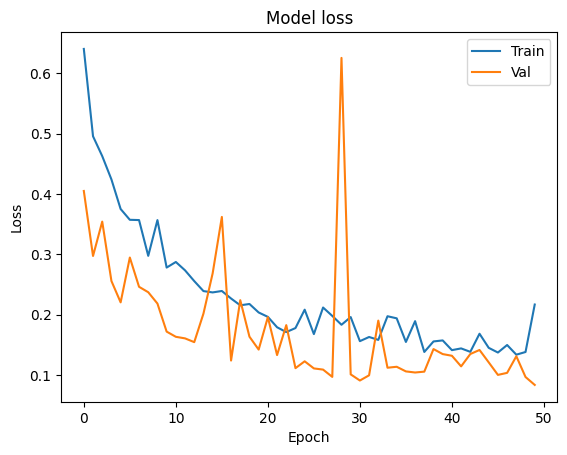

In [366]:
plt.figure()
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can see that the loss is decreasing with the number of epochs. This means that the model is learning and is not overfitting. This is a good sign. However, the validation loss is not decreasing smoothly.

# 5. Use the model to make predictions

We are going to make prediction on a new dataset. First we import it.

In [367]:
df40 = pd.read_csv('data40_x.csv')
df40.head()

,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
0,20,40,0.12,90.0,0.0125,0.0258,6.123234e-17,0.01359,0.313311
1,20,40,0.12,90.0,0.0175,0.0246,6.123234e-17,0.01359,0.313311
2,20,40,0.12,90.0,0.0225,0.0234,6.123234e-17,0.01359,0.313311
3,20,40,0.12,90.0,0.0275,0.0222,6.123234e-17,0.01359,0.313311
4,20,40,0.12,90.0,0.0325,0.0210,6.123234e-17,0.01359,0.313311


Description of the dataset

In [368]:
df40.describe()

,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
count,1410.000000,1410.0,1410.000000,1410.000000,1410.000000,1410.000000,1.410000e+03,1410.000000,1410.000000
mean,19.878014,40.0,0.480343,93.117749,0.164396,0.174845,-4.655214e-02,0.105657,0.356336
std,0.478804,0.0,0.462814,40.266437,0.147870,0.122561,6.082683e-01,0.055590,0.045528
min,18.000000,40.0,0.120000,15.541000,0.000100,0.015600,-7.660444e-01,0.012554,0.296845
25%,20.000000,40.0,0.280000,60.000000,0.062500,0.082850,-7.660444e-01,0.063861,0.324725
50%,20.000000,40.0,0.360000,90.000000,0.127500,0.143977,6.123234e-17,0.099725,0.346879
75%,20.000000,40.0,0.480000,140.000000,0.222500,0.236985,5.000000e-01,0.140738,0.384172
max,20.000000,40.0,2.222000,140.000000,0.937000,0.724785,9.634390e-01,0.227664,0.487934


Make predictions on the dataset

First, we need to normalize the dataset.

In [369]:
# Normalize the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df40_norm = scaler.fit_transform(df40)

df40_norm = pd.DataFrame(df40_norm, columns=df40.columns)
df40_norm.head()

,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
0,0.254862,0.0,-0.778869,-0.077455,-1.027596,-1.216524,0.076559,-1.656766,-0.945366
1,0.254862,0.0,-0.778869,-0.077455,-0.993770,-1.226318,0.076559,-1.656766,-0.945366
2,0.254862,0.0,-0.778869,-0.077455,-0.959945,-1.236113,0.076559,-1.656766,-0.945366
3,0.254862,0.0,-0.778869,-0.077455,-0.926119,-1.245907,0.076559,-1.656766,-0.945366
4,0.254862,0.0,-0.778869,-0.077455,-0.892294,-1.255702,0.076559,-1.656766,-0.945366


Then, we can make predictions on the normalized dataset.

In [370]:
y_pred = model.predict(df40_norm)
y_pred = pd.DataFrame(y_pred, columns=["cross_section_norm"])
y_pred.head()

45/45 [==============================] - 0s 1ms/step


,cross_section_norm
0,2.231116
1,1.708582
2,1.191411
3,0.685208
4,0.182130


Denormalize the predictions

To denormalize the predictions, we use the inverse_transform method of the StandardScaler class. We need to, first, fit the scaler on the target variable. Then we can use it to denormalize the predictions.

In [371]:
scaler.fit_transform(y.values.reshape(-1, 1))
y_pred_denorm = scaler.inverse_transform(y_pred)
y_pred_denorm = pd.DataFrame(y_pred_denorm, columns=["cross_section_denorm"])

y_pred_denorm.head()

,cross_section_denorm
0,10800.948242
1,8551.477539
2,6325.094727
3,4145.925781
4,1980.213501


Save the predictions to a csv file

In [372]:
df_pred_combined = pd.concat([y_pred, y_pred_denorm], axis=1)
df_pred_combined.to_csv('data40_y.csv', index=False)
print("Predictions saved to data40_y.csv")

Predictions saved to data40_y.csv
